In [1]:
(19+4)%5+1


4

In [3]:
1, 3, 6, 7, 8, 12, 13, 14, 15, 16, 17, 19, 
20, 22, 24, 25, 26, 27



(20, 22, 24, 25, 26, 27)

In [59]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
filePath = "./res/NationalNames.csv"


<h1>1 - first 8 rows</h1>

In [5]:
df = pd.read_csv(filePath, nrows = 8)
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


<h1>3 - column header name</h1>

In [6]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

<h1>6 - unique names</h1>

In [7]:
file = pd.read_csv(filePath)
count = file.groupby('Gender')['Name'].nunique()
count

Gender
F    64911
M    39199
Name: Name, dtype: int64

<h1>7</h1>

In [8]:
male = file[(file['Gender'] == 'M') & (file['Year'] == 2010)]
male.head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


<h1>8</h1>

In [14]:
count = file.loc[file['Count'].idxmax()]
count

Id        431053
Name       Linda
Year        1947
Gender         F
Count      99680
Name: 431052, dtype: object

<h1>12</h1>

In [25]:
year = file.groupby("Year")["Name"].nunique().idxmax()
filtered = file[file["Year"] == year]
res = filtered.loc[filtered["Count"].idxmax()]
res

Id        1608303
Name        Jacob
Year         2008
Gender          M
Count       22568
Name: 1608302, dtype: object

<h1>13</h1>

In [26]:
filtered_gender = file[file["Gender"] == "F"]
filtered_names = filtered_gender[filtered_gender["Name"] == "Jacob"]
res = filtered_names.loc[filtered_names["Count"].idxmax()]
res

Id        1455557
Name        Jacob
Year         2004
Gender          F
Count         171
Name: 1455556, dtype: object

<h1>14</h1>

In [44]:
names = file.groupby(['Year', 'Name'])['Gender'].nunique().reset_index().query('Gender == 2')
counts = names.groupby('Year').size()
max_year = counts.idxmax()
max_count = counts.max()

print(f"Year: {max_year} (count: {max_count})")

Year: 2008 (count: 2557)


<h1>15</h1>

In [50]:
sorted_by_year = file.groupby("Year")["Count"].sum()
sorted_by_year.head()

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64

<h1>16</h1>

In [55]:
sorted_by_year = file.groupby('Year')['Count'].sum()
max_births_year = sorted_by_year.idxmax()
max_births_count = sorted_by_year.max()
print(f"Year: {max_births_year} (count: {max_births_count})")

Year: 1957 (count: 4200026)


<h1>17</h1>

In [58]:
births_by_gender_per_year = file.groupby(['Year', 'Gender'])['Count'].sum().unstack()
births_by_gender_per_year = births_by_gender_per_year.fillna(0)
births_by_gender_per_year.head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


<h1>19</h1>

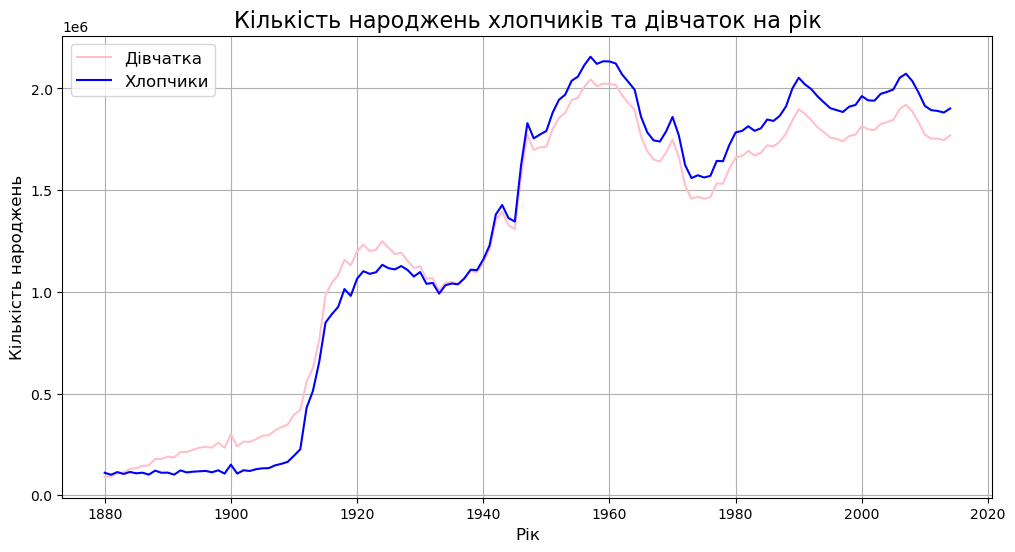

In [60]:
births_by_gender_per_year = file.groupby(['Year', 'Gender'])['Count'].sum().unstack()

plt.figure(figsize=(12, 6))
plt.plot(births_by_gender_per_year.index, births_by_gender_per_year['F'], label='Дівчатка', color='pink')
plt.plot(births_by_gender_per_year.index, births_by_gender_per_year['M'], label='Хлопчики', color='blue')

plt.title('Кількість народжень хлопчиків та дівчаток на рік', fontsize=16)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Кількість народжень', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

<h1>20</h1>

In [67]:
names_gender_count = file.groupby(['Name', 'Gender'])['Count'].sum().unstack()
neutral_names = names_gender_count.dropna()
neutral_name_count = neutral_names.shape[0]
neutral_name_count

10221

<h1>22</h1>

In [74]:
filtered_years = file["Year"].nunique()
filtered_years

135

<h1>24</h1>

In [76]:
names_count = file.groupby('Name')['Count'].sum()
min_count = names_count.min()
least_popular_names = names_count[names_count == min_count]
most_popular_least_names = least_popular_names.idxmax()
most_popular_least_names_count = least_popular_names.max()
print(f"Найпопулярніше серед непопулярних ім'я: {most_popular_least_names} з кількістю народжень: {most_popular_least_names_count}")

Найпопулярніше серед непопулярних ім'я: Aabid з кількістю народжень: 5


<h1>25</h1>

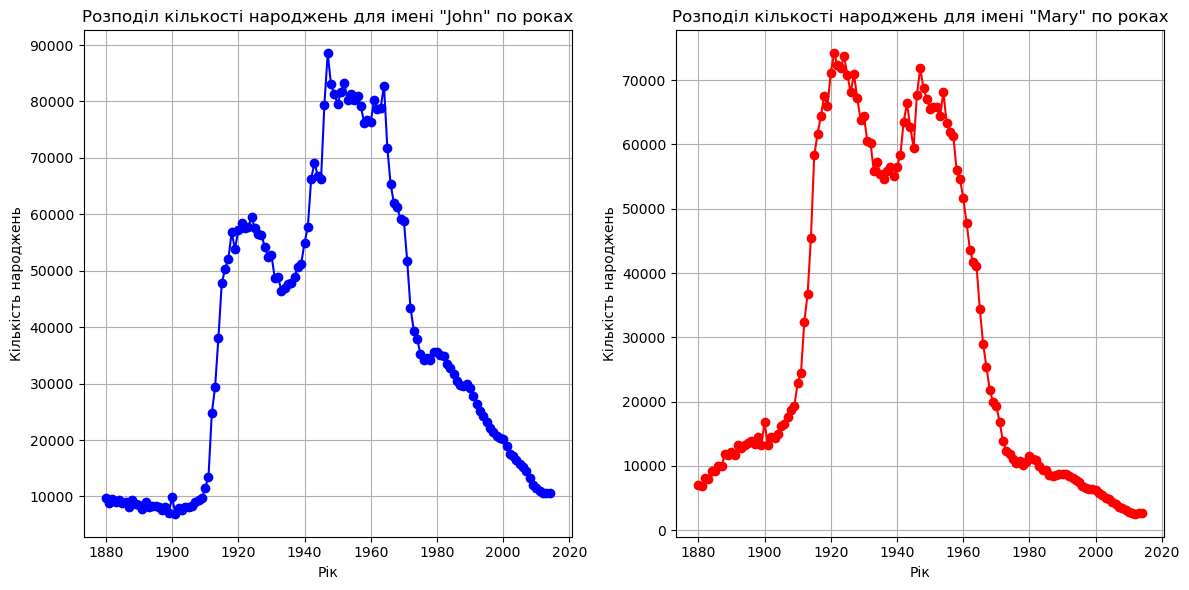

In [77]:
df_john_mary = file[file['Name'].isin(['John', 'Mary'])]
names_year_count = df_john_mary.groupby(['Name', 'Year'])['Count'].sum().unstack()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
names_year_count.loc['John'].plot(kind='line', marker='o', color='blue')
plt.title('Розподіл кількості народжень для імені "John" по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.grid(True)

plt.subplot(1, 2, 2)
names_year_count.loc['Mary'].plot(kind='line', marker='o', color='red')
plt.title('Розподіл кількості народжень для імені "Mary" по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.grid(True)

plt.tight_layout()
plt.show()


<h1>26</h1>

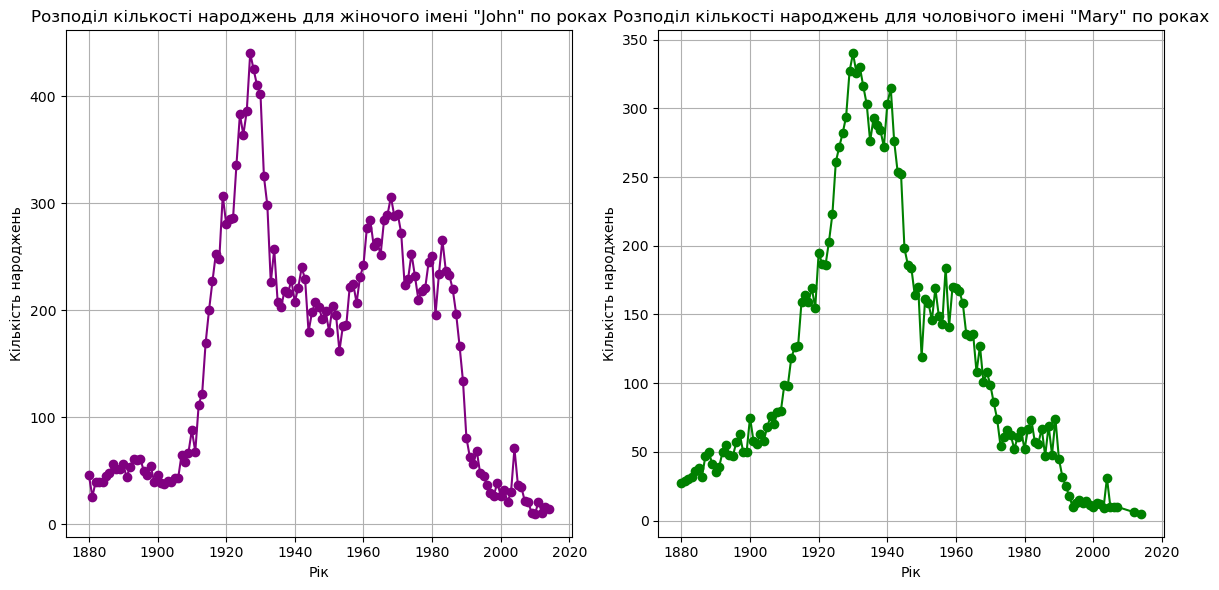

In [78]:
df_female_john = file[(file['Name'] == 'John') & (df['Gender'] == 'F')]
df_male_mary = file[(file['Name'] == 'Mary') & (df['Gender'] == 'M')]

female_john_years = df_female_john.groupby('Year')['Count'].sum()
male_mary_years = df_male_mary.groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
female_john_years.plot(kind='line', marker='o', color='purple')
plt.title('Розподіл кількості народжень для жіночого імені "John" по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.grid(True)

plt.subplot(1, 2, 2)
male_mary_years.plot(kind='line', marker='o', color='green')
plt.title('Розподіл кількості народжень для чоловічого імені "Mary" по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.grid(True)

plt.tight_layout()
plt.show()


<h1>27</h1>

In [80]:
yearly_name_count = file.groupby(['Year', 'Name'])['Count'].sum()
most_popular_names = yearly_name_count.groupby('Year').idxmax()
most_popular_names_count = yearly_name_count.loc[most_popular_names]
result

,Year,Most Popular Name,Count
0,1880,"(1880, John)",9701
1,1881,"(1881, John)",8795
2,1882,"(1882, John)",9597
3,1883,"(1883, John)",8934
4,1884,"(1884, John)",9428
...,...,...,...
130,2010,"(2010, Isabella)",22913
131,2011,"(2011, Sophia)",21839
132,2012,"(2012, Sophia)",22285
133,2013,"(2013, Sophia)",21172
